# Chapter Goals
- A taxonomy of fields relevant to learning from data, including data science, machine learning, and statistics.
- Data mining life-cycle

# Lab Goals
- Hands-on familiarity with weka, pandas, and matplotlib.

---

# 1.1 & 1.5 Data Mining, Machine Learning, and Statistics

**Task 1.1.1** Select three courses from your studied curriculum whose methodology is based on Math/Logic, Science, and Engineering, respectively. Illustrate your decisions.

**Task 1.1.2** Can we learn from data without using any machine learning algorithm? Draw some examples.

**Task 1.1.3** Judge whether the above data has a pattern or a special feature, and explain.

In [ ]:
# Data 1
[
    [1, 10],
    [2, 9],
    [3, 8],
    [4, 7],
    [5, 6],
]

# Data 2
[1.1, 1.2, 0.8, 0.9, 1, 1,1]

# Data 3
[1, 4, 9, 16, 25, 36]

# Data 4
[19, 35] # The time in which the author wrote line

**Answer**

**Task 1.1.4** Construct a linear model approximating _Data 1_ without using any machine learning algorithm. You can use the below code snippet

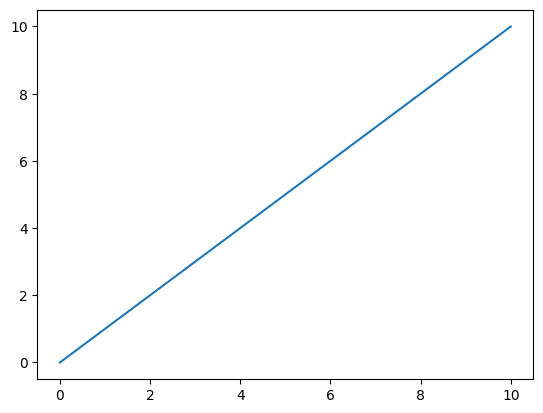

In [ ]:
# Linear model visualized

# Define the linear equation: y = mx + b
m = 1.00  # Slope
b = 0.00  # Y-intercept

# Generate x-values and y-values using the equation
x_values = np.linspace(0, 10)  # Adjust the range and number of points as needed
y_values = (m * x_values) + b

# Plot the scatter and line
plt.plot(x_values, y_values)

**Challenge 1.1.5** Research traditional statistics methodologies, through which statisticians were able to construct models and verify their accuracy.

# 1.2. Simple Examples: The Weather Problem and Others (Hello-world Tutorials)

## Modules & Datasets Setup

In [ ]:
# @title
!apt-get install default-jdk
!apt install libgraphviz-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  default-jdk-headless default-jre default-jre-headless fonts-dejavu-core
  fonts-dejavu-extra libatk-wrapper-java libatk-wrapper-java-jni libfontenc1
  libice-dev libsm-dev libxkbfile1 libxt-dev libxtst6 libxxf86dga1
  openjdk-11-jdk openjdk-11-jre x11-utils
Suggested packages:
  libice-doc libsm-doc libxt-doc openjdk-11-demo openjdk-11-source visualvm
  mesa-utils
The following NEW packages will be installed:
  default-jdk default-jdk-headless default-jre default-jre-headless
  fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libfontenc1 libice-dev libsm-dev libxkbfile1
  libxt-dev libxtst6 libxxf86dga1 openjdk-11-jdk openjdk-11-jre x11-utils
0 upgraded, 18 newly installed, 0 to remove and 18 not upgraded.
Need to get 5,518 kB of archives.
After this operation, 15.8 MB of additional disk space will be u

In [ ]:
# @title
!pip install pygraphviz
!pip install python-javabridge
!pip install python-weka-wrapper3
!pip install sklearn-weka-plugin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.8/120.8 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pygraphviz: filename=pygraphviz-1.11-cp310-cp310-linux_x86_64.whl size=175927 sha256=65521de22428a5c41afd460979d8dfe5cc868efdd899874bc4ba5d6f26e00df6
  Stored in directory: /root/.cache/pip/wheels/5b/ee/36/f47a0d35664fbe1a2b5a433ae33c6ad636b00bb231f68a9aaa
Successfully built pygraphviz
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 14.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for python-javabridge: filename=python_javabridge-4.0.3-cp310-cp310-linux_x86_64.whl size=1743153 sha256=3e3bb4a4f4df84a11683b01645eb735b7d70eced92c667b09215385df8691d2c
  Stored in directory: /root/.cache/pip/wheels/35/58/be/c5d71b71a9dd6585f897fa5b2d021e03962eb30d6b20797396
Successfully built python-javabridge
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
# @title
#Restart runtime after installing the dependencies

In [ ]:
# @title
import os
import glob
import numpy as np
import pandas as pd
import weka.core.jvm as jvm
from weka.core import converters
import matplotlib.pyplot as plt

In [ ]:
# @title
data_dir = 'data'

In [ ]:
# @title
#!rm -r weka
#!rm -r data

In [ ]:
# @title
#jvm.stop()
jvm.start(packages=True)

DEBUG:weka.core.jvm:Adding bundled jars
DEBUG:weka.core.jvm:Classpath=['/usr/local/lib/python3.10/dist-packages/javabridge/jars/rhino-1.7R4.jar', '/usr/local/lib/python3.10/dist-packages/javabridge/jars/runnablequeue.jar', '/usr/local/lib/python3.10/dist-packages/javabridge/jars/cpython.jar', '/usr/local/lib/python3.10/dist-packages/weka/lib/mtj.jar', '/usr/local/lib/python3.10/dist-packages/weka/lib/core.jar', '/usr/local/lib/python3.10/dist-packages/weka/lib/weka.jar', '/usr/local/lib/python3.10/dist-packages/weka/lib/arpack_combined.jar', '/usr/local/lib/python3.10/dist-packages/weka/lib/python-weka-wrapper.jar']
DEBUG:weka.core.jvm:MaxHeapSize=default
DEBUG:weka.core.jvm:Package support enabled


In [ ]:
# @title
# Preparing Datasets
if not os.path.exists(data_dir):
    !mkdir $data_dir
    for file in ['airline.arff', 'breast-cancer.arff', 'contact-lenses.arff', 'cpu.arff', 'cpu.with.vendor.arff', 'credit-g.arff', 'diabetes.arff', 'glass.arff', 'hypothyroid.arff', 'ionosphere.arff', 'iris.2D.arff', 'iris.arff', 'labor.arff', 'segment-challenge.arff', 'segment-test.arff', 'soybean.arff', 'supermarket.arff', 'unbalanced.arff', 'vote.arff', 'weather.nominal.arff', 'weather.numeric.arff',]:
        url = 'https://git.cms.waikato.ac.nz/weka/weka/-/raw/main/trunk/wekadocs/data/' + file
        !wget -P $data_dir $url
    loader = converters.Loader(classname="weka.core.converters.ArffLoader")
    saver = converters.Saver(classname="weka.core.converters.CSVSaver")
    for file in glob.glob(os.path.join(data_dir, '*.arff')):
        dataset = loader.load_file(file)
        filename, file_extension = os.path.splitext(file)
        saver.save_file(dataset, filename + '.csv')
    !wget -P $data_dir https://raw.githubusercontent.com/Rytuo/ITMO-CT/master/Others/AdvancedML/data/OpenML/data/1438.arff
    !rm -r weka

--2023-09-29 14:14:08--  https://git.cms.waikato.ac.nz/weka/weka/-/raw/main/trunk/wekadocs/data/airline.arff
Resolving git.cms.waikato.ac.nz (git.cms.waikato.ac.nz)... 130.217.218.43
Connecting to git.cms.waikato.ac.nz (git.cms.waikato.ac.nz)|130.217.218.43|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2357 (2.3K) [text/plain]
Saving to: ‘data/airline.arff’

airline.arff        100%[===================>]   2.30K  --.-KB/s    in 0s      

2023-09-29 14:14:10 (977 MB/s) - ‘data/airline.arff’ saved [2357/2357]

--2023-09-29 14:14:10--  https://git.cms.waikato.ac.nz/weka/weka/-/raw/main/trunk/wekadocs/data/breast-cancer.arff
Resolving git.cms.waikato.ac.nz (git.cms.waikato.ac.nz)... 130.217.218.43
Connecting to git.cms.waikato.ac.nz (git.cms.waikato.ac.nz)|130.217.218.43|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29418 (29K) [text/plain]
Saving to: ‘data/breast-cancer.arff’

breast-cancer.arff  100%[===================>]  28.73K   

## Reading data

In [ ]:
# Dataset names
# "airline", "breast-cancer", "contact-lenses", "cpu", "cpu.with.vendor", "credit-g", "diabetes", "glass", "hypothyroid", "ionosphere", "iris.2D", "iris", "labor", "segment-challenge", "segment-test", "soybean", "supermarket", "unbalanced", "vote", "weather.nominal", "weather.numeric"

In [ ]:
# Read CSV dataset
pd.read_csv("data/weather.numeric.csv")

,outlook,temperature,humidity,windy,play
0,sunny,85,85,False,no
1,sunny,80,90,True,no
2,overcast,83,86,False,yes
3,rainy,70,96,False,yes
4,rainy,68,80,False,yes
5,rainy,65,70,True,no
6,overcast,64,65,True,yes
7,sunny,72,95,False,no
8,sunny,69,70,False,yes
9,rainy,75,80,False,yes


In [ ]:
# Read Arff dataset
loader.load_file("data/weather.numeric.arff")

@relation weather

@attribute outlook {sunny,overcast,rainy}
@attribute temperature numeric
@attribute humidity numeric
@attribute windy {TRUE,FALSE}
@attribute play {yes,no}

@data
sunny,85,85,FALSE,no
sunny,80,90,TRUE,no
overcast,83,86,FALSE,yes
rainy,70,96,FALSE,yes
rainy,68,80,FALSE,yes
rainy,65,70,TRUE,no
overcast,64,65,TRUE,yes
sunny,72,95,FALSE,no
sunny,69,70,FALSE,yes
rainy,75,80,FALSE,yes
sunny,75,70,TRUE,yes
overcast,72,90,TRUE,yes
overcast,81,75,FALSE,yes
rainy,71,91,TRUE,no

**Task 1.2.1** Read _iris_ data.

## Data Selection & Manipulation

- [Pandas. 10 Minutes Guide](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html)
  - Basic data structures in pandas
  - Object creation
  - Viewing data
  - Selection
  - ~Missing data~
  - Operations
  - ~Merge~
  - Grouping
  - ~Reshaping~
  - ~Time series~
  - ~Categoricals~
  - ~Plotting~
  - ~Importing and exporting data~
  - ~Gotchas~

- Weka
  - [Dataset Subsets](https://fracpete.github.io/python-weka-wrapper3/examples.html#dataset-subsets)

**Task 1.2.2** Apply the given tutorials on weather dataframe.

## Plotting
- [Pandas Plotting](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)
  - Basic plotting: plot
  - ~Other plots~
  - ~Plotting with missing data~
  - ~Plotting tools~
  - ~Plot formatting~
  - ~Plotting directly with Matplotlib~
  - ~Plotting backends~



**Task 1.2.3** Apply the given tutorials on weather dataframe

## Functional Programming (Don't Loop!)
A clean code principle in data manipulation is to never loop or iteratire on rows/columns. Always use mapping methods to transform the data.

In [ ]:
# Create a DataFrame
df = pd.DataFrame({
    "name": ["Alice", "Bob", "Carol"],
    "age": [1, 5, 10]
  })

df

In [ ]:
# Column-wise

# Define a mapping function
def square_age(age):
  return age * age

# Apply the mapping function to a dataframe's column
df["age"].apply(square_age)

0      1
1     25
2    100
Name: age, dtype: int64

In [ ]:
# Lambda function
df['age'].apply(lambda x: x * x)

0      1
1     25
2    100
Name: age, dtype: int64

In [ ]:
# Row-wise
def add_one(row):
  row["age"] = row["age"]+1
  return row

df.apply(add_one, axis=1)

,name,age
0,Alice,3
1,Bob,7
2,Carol,12


In [ ]:
# Element-wise
df.applymap(lambda x: type(x))

,name,age
0,<class 'str'>,<class 'int'>
1,<class 'str'>,<class 'int'>
2,<class 'str'>,<class 'int'>


**Task 1.2.4** Apply the given tutorial on weather dataset.

**Task 1.2.5** On the age dataframe. Map names to the length of their strings. Then use `apply` function twice to compute the total sum of ages and names lengths.

**Task 1.2.6** Solve _task 5_ again but using `df.sum()` in place of `apply`.

# 1.3 Fielded Applications

**Task 1.3.1** Select a favorite domain of your choice, like fashion or sports, and search for a use-case utilizing data mining in it.

**Answer**

# 1.4 The Data Mining Process

**Task 1.4.1** Search for a tutorial for each step of the data-mining process.

Recall the cycle is: Business Understanding, Data Understanding, Data Preparation, Modeling, Evaluation, Deployment.

**Answer**

# 1.6 Generalization as Search

![](https://1.cms.s81c.com/sites/default/files/2021-03-03/model-over-fitting.png)

**Task 1.6.1** Think of of model fitting as the problem of searching all possible curves separating the two features. Guess how can we ensure the search process always terminates. Guess some scenarios in which the search process yields unoptimal model.

**Answer**

# 1.7 Data mining and Ethics

**Task 1.7.1** Consider a scenario in which learning from data concluded females are less likely to accommodate a loan, and as a result a girl's chances are less. Should we follow the data? Why?

**Answer**

# Project. Phase 1
- Select some kaggle notebooks and a dataset.